# Traveloka Sentiment Analysis

![Traveloka Logo](https://console.kr-asia.com/wp-content/uploads/2020/12/traveloka.jpg)

![Python](https://img.shields.io/badge/Python-3.12-blue)
![Machine Learning](https://img.shields.io/badge/Machine%20Learning-Sentiment%20Analysis-orange)
![Scikit-Learn](https://img.shields.io/badge/Scikit--Learn-Modeling-yellow)
![Status](https://img.shields.io/badge/Status-Completed-brightgreen)

---

### 👤 My Identity
- **Name** : Indra Styawan  
- **Role** : Data Science  
- **Domicile** : Yogyakarta, Indonesia  
- **Email** : indrastyawan0925@gmail.com  
- **LinkedIn** : www.linkedin.com/in/indrastyawan25

---

<h1><center>📈 Analysis of App's Review on Traveloka Application </center></h1>

### 📝 Introduction
<p align="justify">The application review analysis program in the Traveloka application is a machine learning application that aims to analyze reviews in the Play Store on the Traveloka application. The general purpose of this program is to find out which reviews are positive, negative, or neutral, so that it can be analyzed how the public responds to the Traveloka application that can be used to book flights, hotels, and various travel-related services.</p>

### 🎯 Objective
<p align="justify">The process of analyzing and evaluating reviews or feelings expressed by Traveloka application users in their reviews that touch on Traveloka application services on the Play Store.</p>

### 🔍 Process
- 📥 **Data Collection**: Data collection was carried out by collecting data on the Play Store with the Traveloka application ID using the Google-Play-Scraper library.  
- 🧹 **Data Preprocessing**: CleaningText, casefoldingText, tokenizationText, filteringText, stemming/lemmatization, and toSentence.  
- 🏷️ **Data Labeling**: The process of assigning a category or label to each data entry based on available information.  
- ☁️ **Label Exploration**: This visualization uses WordCloud.  
- ✂️ **Dataset Splitting**: Splitting the dataset into training, validation, and test sets for the model training process.  
- 🧠 **Model Building**: Build a classification model using a random forest, support vector machines, gradient boosting machines, and XGBoost.  
- 🏋️‍♂️ **Model Training**: Training a model on a training dataset by optimizing its parameters and weights so that it can recognize patterns in text.  
- ✅ **Model Validation**: Validate the model on the validation dataset to measure its performance and prevent overfitting.  
- 📊 **Evaluation and Tuning**: Evaluate the model on the test dataset and adjust parameters if necessary.


## 1. Importing Packages

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [1]:
!pip install sastrawi

In [2]:
# Import library for data cleaning
import pandas as pd  # Pandas for data manipulation and analysis
pd.options.mode.chained_assignment = None  # Disable chained assignment warning
import numpy as np  # NumPy for numerical computation
seed = 0
np.random.seed(seed)  # Set seed for reproducibility
import re  # Module for working with regular expressions
import string  # Contains string constants such as punctuation marks
import nltk  # Import NLTK (Natural Language Toolkit) library
nltk.download('punkt')  # Download dataset required for text tokenization
nltk.download('punkt_tab')  # Download dataset required for text tokenization
nltk.download('stopwords')  # Download dataset containing stopword lists in various languages
from nltk.tokenize import word_tokenize  # Text tokenization
from nltk.corpus import stopwords  # Stopword list in text
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (removing word affixes) for Indonesian language
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Remove stopwords in Indonesian language
import csv
import requests
from io import StringIO

# Import library for visualization
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for statistical data visualization and style setting
from wordcloud import WordCloud  # Create a word cloud visualization from text

# Import library for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Import library for processing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Loading Data

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load data from local and then extract it to the storage directory. |

---

In [3]:
app_reviews_df = pd.read_csv('traveloka_review_data.csv')
app_reviews_df.shape

(15000, 11)

In [4]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,249bad51-ff7c-41a2-8769-9c93164a9a2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa kalau mau melakukan pembayaran harganya...,1,31,5.21.0,2025-06-12 13:20:07,"Hai Dina, kami mohon maaf atas kekecewaan Anda...",2025-06-12 13:56:27,5.21.0
1,ac1f0759-b36e-40d1-af4f-f1a5e65d226e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Salah satu fitur terbaik adalah informasi posi...,5,45,5.21.0,2025-06-16 12:12:49,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-06-16 12:35:06,5.21.0
2,18b085b3-547e-47c6-a095-54d6d7ccef07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kok traveloka skrg jd aneh, tiba2 saja limit t...",1,47,5.20.0,2025-06-07 04:56:51,"Hai Wida, kami mohon maaf atas ketidaknyamanan...",2025-06-07 05:17:08,5.20.0
3,6f5b0ca2-b296-45e8-9592-553632b91387,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menginap di hotel o surabaya bayar by aplikasi...,1,8,5.21.0,2025-06-12 14:56:08,"Hai Youle, kami mohon maaf terkait masalah den...",2025-06-12 15:10:33,5.21.0
4,2bf470ad-aeac-4f0b-9c93-39f48f384009,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya mau pesan tiket kereta dari jember ke jak...,3,4,5.21.0,2025-06-13 05:41:36,"Hai Pengguna Setia Traveloka, kami mohon maaf ...",2025-06-13 06:28:55,5.21.0


In [5]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  12333 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          11153 non-null  object
 9   repliedAt             11153 non-null  object
 10  appVersion            12333 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


## 3. Data Preprocessing

---
    
| ⚡ Description: Data preprocessing ⚡ |
| :--------------------------- |
| These preprocessing steps aim to remove noise, convert text to a consistent format, and extract important features for further analysis. |

---
- <p align = "justify">Cleans the text by removing mentions, hashtags, RTs (retweets), links, numbers and punctuation. Additionally, newline characters are replaced with spaces and extra spaces at the start and end of text are removed.

- <p align = "justify">Converts all characters in the text to lowercase to make the text uniform.
tokenizingText(text): Breaks text into a list of words or tokens. It helps in breaking down the text into basic components for further analysis.

- <p align = "justify">Removes stop words in text. The list of stop words has been updated with some additional words.

- <p align = "justify">Applies stemming to text, i.e. reduces words to their basic forms. You use the Sastrawi library to do stemming in Indonesian.

- <p align = "justify">Combines a list of words into a sentence.

In [6]:
# Create a new DataFrame (clean_df) by removing rows with missing (NaN) values from app_reviews_df
clean_df = app_reviews_df.dropna(subset=['content'])

In [7]:
# Remove duplicate rows from the clean_df DataFrame
clean_df = clean_df.drop_duplicates(subset=['content'])

clean_df.shape

(14945, 11)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14945 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              14945 non-null  object
 1   userName              14945 non-null  object
 2   userImage             14945 non-null  object
 3   content               14945 non-null  object
 4   score                 14945 non-null  int64 
 5   thumbsUpCount         14945 non-null  int64 
 6   reviewCreatedVersion  12282 non-null  object
 7   at                    14945 non-null  object
 8   replyContent          11103 non-null  object
 9   repliedAt             11103 non-null  object
 10  appVersion            12282 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.4+ MB


#### Cleaning dataframe

In [9]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # remove hashtags
    text = re.sub(r'RT[\s]', '', text)  # remove retweet symbols
    text = re.sub(r"http\S+", '', text)  # remove URLs
    text = re.sub(r'[0-9]+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove special characters except letters and numbers
    text = re.sub(r'(.)\1+', r'\1\1', text)  # reduce repeated characters to at most two
    text = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1', text, flags=re.IGNORECASE)  # remove duplicated words
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = re.sub(r'\b\w{1,3}\b', '', text)  # remove words with 1 to 3 letters

    text = text.replace('\n', ' ')  # replace newlines with spaces
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove all punctuation
    text = text.strip(' ')  # remove leading and trailing whitespace
    return text


In [10]:
def casefoldingText(text): # Converts all characters in the text to lowercase
    text = text.lower()
    return text

def tokenizingText(text): # Breaks or divides a string, text into a list of tokens
    text = word_tokenize(text)
    return text

In [11]:
def filteringText(text): # renove stopwords from texts
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di",'uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar',
         'syantienurxsayurbox', 'ghinaxsayurbox', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt', "ga","ya","gaa","loh","kah","woi","woii","woy", "wkwkwk", "haha"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

In [12]:
def stemmingText(text): # Reduces words to their basic form by removing prefixes and suffixes or to the root word
    # Create stemmer object
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Split the text into a list of words
    words = text.split()

    # Apply stemming to each word in the list
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the stemmed words
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

In [13]:
def toSentence(list_words): # convert letter to the sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [14]:
slangs = open('slang.txt', 'r', encoding="utf-8", errors='replace')
clear_slangs = []
for newlines in slangs:
  strip_re = newlines.strip('\n')
  split = re.split(r'[:]', strip_re)
  clear_slangs.append(split)

In [15]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [16]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in dict_slangs:
            fixed_words.append(dict_slangs[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [17]:
# Clean the text and store it in the 'text_clean' column
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Convert text to lowercase and store it in the 'text_casefoldingText' column
clean_df['text_caseFoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Replace slang words with standard words and store the result in the 'text_slangwords' column
clean_df['text_slangword'] = clean_df['text_caseFoldingText'].apply(fix_slangwords)

# Tokenize the text (split into words) and store it in the 'text_tokenizingText' column
clean_df['text_tokenizingText'] = clean_df['text_slangword'].apply(tokenizingText)

# Remove stopwords (common words) and store the result in the 'text_stopword' column
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Join the tokens back into a sentence and store it in the 'text_final' column
clean_df['text_final'] = clean_df['text_stopword'].apply(toSentence)

In [19]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_caseFoldingText,text_slangword,text_tokenizingText,text_stopword,text_final
0,249bad51-ff7c-41a2-8769-9c93164a9a2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa kalau mau melakukan pembayaran harganya...,1,31,5.21.0,2025-06-12 13:20:07,"Hai Dina, kami mohon maaf atas kekecewaan Anda...",2025-06-12 13:56:27,5.21.0,kenapa kalau melakukan pembayaran harganya ja...,kenapa kalau melakukan pembayaran harganya ja...,kenapa kalau melakukan pembayaran harganya jad...,"[kenapa, kalau, melakukan, pembayaran, hargany...","[pembayaran, harganya, berubah, harga, harga, ...",pembayaran harganya berubah harga harga terter...
1,ac1f0759-b36e-40d1-af4f-f1a5e65d226e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Salah satu fitur terbaik adalah informasi posi...,5,45,5.21.0,2025-06-16 12:12:49,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-06-16 12:35:06,5.21.0,Salah satu fitur terbaik adalah informasi posi...,salah satu fitur terbaik adalah informasi posi...,salah satu fitur terbaik adalah informasi posi...,"[salah, satu, fitur, terbaik, adalah, informas...","[salah, fitur, terbaik, informasi, posisi, rea...",salah fitur terbaik informasi posisi realtime ...
2,18b085b3-547e-47c6-a095-54d6d7ccef07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kok traveloka skrg jd aneh, tiba2 saja limit t...",1,47,5.20.0,2025-06-07 04:56:51,"Hai Wida, kami mohon maaf atas ketidaknyamanan...",2025-06-07 05:17:08,5.20.0,traveloka skrg aneh tiba saja limit tpaylater...,traveloka skrg aneh tiba saja limit tpaylater...,traveloka sekarang aneh tiba saja limit tpayla...,"[traveloka, sekarang, aneh, tiba, saja, limit,...","[traveloka, aneh, limit, tpaylaternya, lancar,...",traveloka aneh limit tpaylaternya lancar mudah...
3,6f5b0ca2-b296-45e8-9592-553632b91387,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menginap di hotel o surabaya bayar by aplikasi...,1,8,5.21.0,2025-06-12 14:56:08,"Hai Youle, kami mohon maaf terkait masalah den...",2025-06-12 15:10:33,5.21.0,menginap hotel surabaya bayar aplikasi trev...,menginap hotel surabaya bayar aplikasi trev...,menginap hotel surabaya bayar aplikasi trevelo...,"[menginap, hotel, surabaya, bayar, aplikasi, t...","[menginap, hotel, surabaya, bayar, aplikasi, t...",menginap hotel surabaya bayar aplikasi trevelo...
4,2bf470ad-aeac-4f0b-9c93-39f48f384009,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya mau pesan tiket kereta dari jember ke jak...,3,4,5.21.0,2025-06-13 05:41:36,"Hai Pengguna Setia Traveloka, kami mohon maaf ...",2025-06-13 06:28:55,5.21.0,saya pesan tiket kereta dari jember jakarta ...,saya pesan tiket kereta dari jember jakarta ...,saya pesan tiket kereta dari jember jakarta ta...,"[saya, pesan, tiket, kereta, dari, jember, jak...","[pesan, tiket, kereta, jember, jakarta, penuh,...",pesan tiket kereta jember jakarta penuh dicoba...


## 4. Data Labeling

---
    
| ⚡ Description: Data labeling ⚡ |
| :--------------------------- |
| The process of assigning a category or label to each data entry based on available information. In this context, each dataset entry is assigned a sentiment label based on analysis of its text. |

---

In [20]:
# read vocab data positif word from github
lexicon_positive = dict()

response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv")
# send HTTP request for get the csv file from github

if response.status_code == 200:
    # if request success
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Read response text as a CSV file using a CSV reader with comma separator

    for row in reader:
        # Loop through each row in a CSV file
        lexicon_positive[row[0]] = int(row[1])
        # Adding positive words and their scores to the lexicon_positive dictionary
else:
    print("Failed to fetch positive lexicon data")

In [21]:
# read vocab data negative word from github
lexicon_negative = dict()

response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv")
# send HTTP request for get the csv file from github

if response.status_code == 200:
    # if request success
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Read response text as a CSV file using a CSV reader with comma separator

    for row in reader:
        # Loop through each row in a CSV file
        lexicon_negative[row[0]] = int(row[1])
        # Adding positive words and their scores to the lexicon_negative dictionary
else:
    print("Failed to fetch negative lexicon data")

In [22]:
# print some entry from the vocab for to make sure the data already loaded
print(list(lexicon_positive.items())[:10])

[('hai', 3), ('merekam', 2), ('ekstensif', 3), ('paripurna', 1), ('detail', 2), ('pernik', 3), ('belas', 2), ('welas', 4), ('kabung', 1), ('rahayu', 4)]


In [23]:
# print some entry from the vocab for to make sure the data already loaded
print(list(lexicon_negative.items())[:10])

[('putus tali gantung', -2), ('gelebah', -2), ('gobar hati', -2), ('tersentuh (perasaan)', -1), ('isak', -5), ('larat hati', -3), ('nelangsa', -3), ('remuk redam', -5), ('tidak segan', -2), ('gemar', -1)]


In [24]:
# Function to determine sentiment polarity from tweet
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Initialize sentiment score to 0

    for word in text:
        # loop every word in the text

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # If the word is in the positive dictionary, add its score to the sentiment score.

    for word in text:
        # Repeats every word in the text (again)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # If the word is in the negative dictionary, subtract its score from the sentiment score

    polarity=''
    # Initialize polarity variables

    if (score > 0):
        polarity = 'positive'
        # If the sentiment score is greater than 0, then the polarity is positive.
    elif (score < 0):
        polarity = 'negative'
        # If the sentiment score is less than 0, then the polarity is negative.
    else:
        polarity = 'neutral'
        # If the sentiment score is equal to 0, then the polarity is neutral.

    return score, polarity
    # Returns sentiment and polarity scores of text

In [25]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    7627
positive    6263
neutral     1055
Name: count, dtype: int64


In [27]:
# Convert label to numeric
label_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
clean_df['label'] = clean_df['polarity'].map(label_mapping)

In [28]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_caseFoldingText,text_slangword,text_tokenizingText,text_stopword,text_final,polarity_score,polarity,label
0,249bad51-ff7c-41a2-8769-9c93164a9a2b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa kalau mau melakukan pembayaran harganya...,1,31,5.21.0,2025-06-12 13:20:07,"Hai Dina, kami mohon maaf atas kekecewaan Anda...",2025-06-12 13:56:27,5.21.0,kenapa kalau melakukan pembayaran harganya ja...,kenapa kalau melakukan pembayaran harganya ja...,kenapa kalau melakukan pembayaran harganya jad...,"[kenapa, kalau, melakukan, pembayaran, hargany...","[pembayaran, harganya, berubah, harga, harga, ...",pembayaran harganya berubah harga harga terter...,1,positive,1
1,ac1f0759-b36e-40d1-af4f-f1a5e65d226e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Salah satu fitur terbaik adalah informasi posi...,5,45,5.21.0,2025-06-16 12:12:49,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-06-16 12:35:06,5.21.0,Salah satu fitur terbaik adalah informasi posi...,salah satu fitur terbaik adalah informasi posi...,salah satu fitur terbaik adalah informasi posi...,"[salah, satu, fitur, terbaik, adalah, informas...","[salah, fitur, terbaik, informasi, posisi, rea...",salah fitur terbaik informasi posisi realtime ...,-14,negative,0
2,18b085b3-547e-47c6-a095-54d6d7ccef07,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kok traveloka skrg jd aneh, tiba2 saja limit t...",1,47,5.20.0,2025-06-07 04:56:51,"Hai Wida, kami mohon maaf atas ketidaknyamanan...",2025-06-07 05:17:08,5.20.0,traveloka skrg aneh tiba saja limit tpaylater...,traveloka skrg aneh tiba saja limit tpaylater...,traveloka sekarang aneh tiba saja limit tpayla...,"[traveloka, sekarang, aneh, tiba, saja, limit,...","[traveloka, aneh, limit, tpaylaternya, lancar,...",traveloka aneh limit tpaylaternya lancar mudah...,6,positive,1
3,6f5b0ca2-b296-45e8-9592-553632b91387,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menginap di hotel o surabaya bayar by aplikasi...,1,8,5.21.0,2025-06-12 14:56:08,"Hai Youle, kami mohon maaf terkait masalah den...",2025-06-12 15:10:33,5.21.0,menginap hotel surabaya bayar aplikasi trev...,menginap hotel surabaya bayar aplikasi trev...,menginap hotel surabaya bayar aplikasi trevelo...,"[menginap, hotel, surabaya, bayar, aplikasi, t...","[menginap, hotel, surabaya, bayar, aplikasi, t...",menginap hotel surabaya bayar aplikasi trevelo...,25,positive,1
4,2bf470ad-aeac-4f0b-9c93-39f48f384009,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya mau pesan tiket kereta dari jember ke jak...,3,4,5.21.0,2025-06-13 05:41:36,"Hai Pengguna Setia Traveloka, kami mohon maaf ...",2025-06-13 06:28:55,5.21.0,saya pesan tiket kereta dari jember jakarta ...,saya pesan tiket kereta dari jember jakarta ...,saya pesan tiket kereta dari jember jakarta ta...,"[saya, pesan, tiket, kereta, dari, jember, jak...","[pesan, tiket, kereta, jember, jakarta, penuh,...",pesan tiket kereta jember jakarta penuh dicoba...,-7,negative,0


## 5. Label Exploration

---
    
| ⚡ Description: Label exploration ⚡ |
| :--------------------------- |
| This visualization uses WorldCloud. WordCloud is a visual representation of words that appear in text, where their size indicates how often they appear. |

---

In [32]:
review_all = []

for review in clean_df['text_final']:
  text = review.split()
  for token_review in text:
    review_all.append(token_review)

In [33]:
from nltk.probability import FreqDist
freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire traveloka's review")
freq_dist

how many frequency distribution samples from an entire traveloka's review


FreqDist({'traveloka': 9657, 'aplikasi': 5447, 'tiket': 4890, 'refund': 3222, 'hotel': 3125, 'pakai': 2445, 'pesan': 2338, 'kasih': 2100, 'paylater': 2000, 'membantu': 1832, ...})

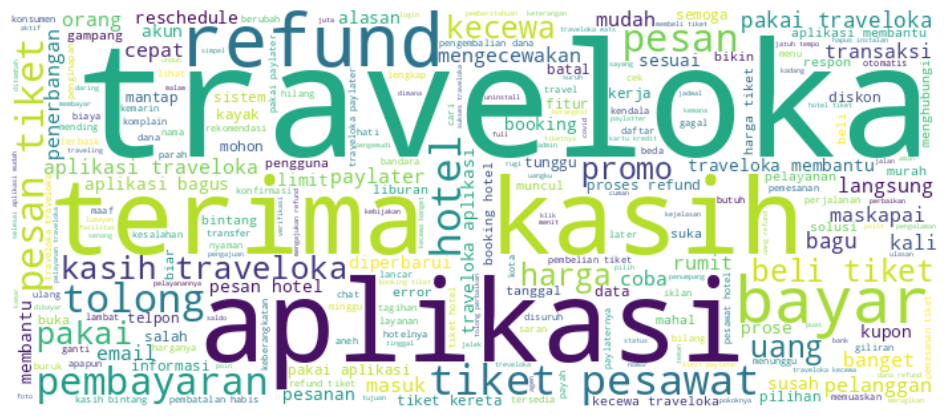

In [34]:
# make visualization WordCloud
join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

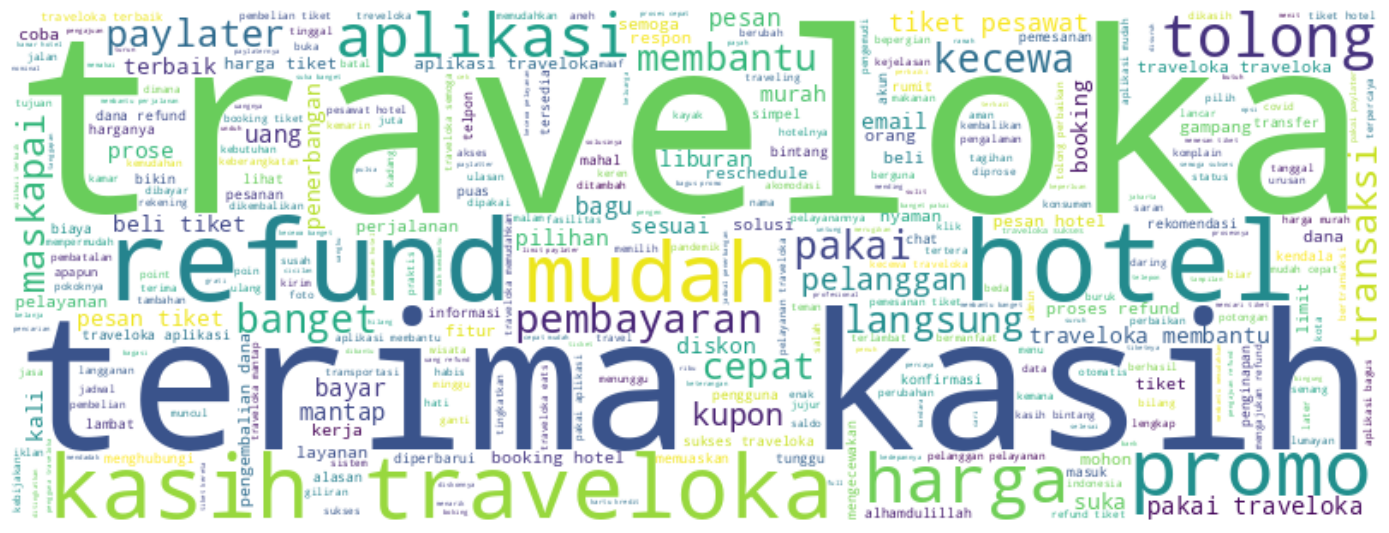

In [35]:
sentiment_pos = ' '.join([review for review in clean_df['text_final'][clean_df['polarity'] == 'positive']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

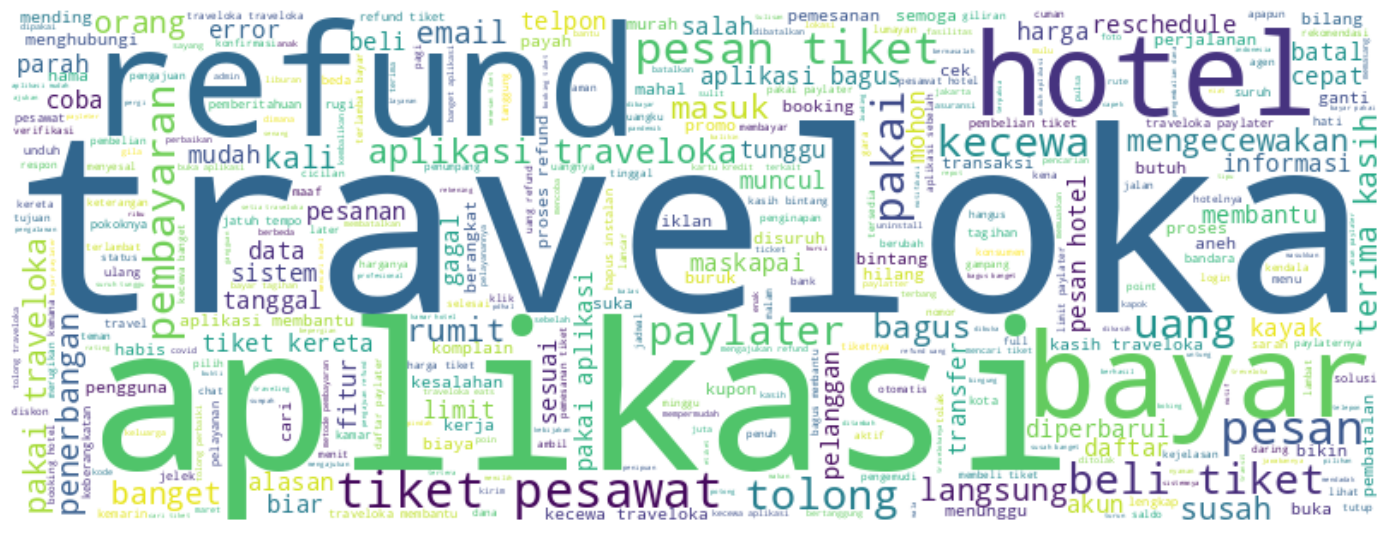

In [36]:
sentiment_neg = ' '.join([review for review in clean_df['text_final'][clean_df['polarity'] == 'negative']])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()